import all dependences

In [1]:
import core.src.features.build_features as Jfeatures
import matplotlib.pyplot as plt
import pandas as pd

read data and build datafram

In [2]:
data_frame = pd.read_csv("../data/raw/CESATEM.tsv", delimiter='\t')
data_frame = data_frame.dropna(axis=1, how='any')
data_frame.describe()

,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,...,BU,BV,BW,BX,BY,BZ,CA,CB,CC,CD
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,1688.156863,1466.882353,5015.421569,9871.039216,7228.990196,860.862745,1781.186275,1559.759804,918.794118,1230.504902,...,7228.480392,5132.372549,617.034314,1479.308824,875.598039,846.367647,1124.838235,3957.593137,2070.044118,1446.348039
std,641.512210,488.785038,1791.518070,3306.904125,2452.870794,615.057385,612.461001,748.789918,307.239139,340.678814,...,1027.406144,743.697578,212.080089,263.422132,129.071314,198.461018,247.304022,614.956858,382.690261,299.160009
min,681.000000,646.000000,1680.000000,4370.000000,3180.000000,304.000000,834.000000,529.000000,362.000000,507.000000,...,5713.000000,3960.000000,394.000000,967.000000,621.000000,228.000000,663.000000,2705.000000,1422.000000,990.000000
25%,1154.000000,1058.250000,3624.750000,6934.750000,5158.250000,520.500000,1244.750000,866.500000,660.750000,925.250000,...,6456.500000,4463.000000,509.000000,1260.000000,778.500000,641.000000,1003.500000,3655.750000,1757.500000,1209.750000
50%,1455.500000,1319.500000,4743.500000,9511.500000,6902.000000,668.500000,1723.500000,1181.500000,904.500000,1279.500000,...,6996.000000,5044.000000,556.000000,1487.000000,868.500000,885.000000,1159.000000,3930.000000,2024.000000,1411.000000
75%,2233.250000,1922.000000,6306.500000,12810.250000,9192.000000,888.500000,2209.500000,2284.750000,1123.000000,1477.250000,...,7705.750000,5688.250000,611.000000,1615.000000,953.500000,983.250000,1306.750000,4225.500000,2385.250000,1598.500000
max,3611.000000,2715.000000,10910.000000,18890.000000,15029.000000,3164.000000,3179.000000,3407.000000,1897.000000,1864.000000,...,9810.000000,6896.000000,1459.000000,2099.000000,1182.000000,1244.000000,1604.000000,6035.000000,2879.000000,2351.000000


Some text

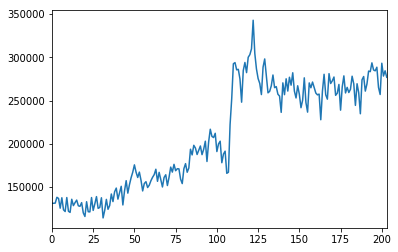

In [3]:
s = data_frame.sum(axis=1)
dates = pd.to_datetime(data_frame["Date"], format='%m/%Y')
plt.figure() #ax = plt.figure().add_subplot(111)
s.plot()
#ax.xaxis.set_major_locator(dates)
#ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%Y'))
#ax.set_ylim(bottom = 0)
#plt.xticks(rotation='vertical')
plt.show()

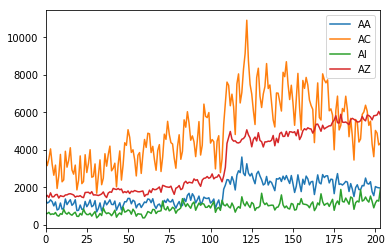

In [4]:
plt.figure()
data_frame[['AA', "AC", "AI", "AZ"]].plot.line()
plt.show()

In [31]:
d1 = data_frame.head(1)
d2 = data_frame.tail(1)
data = pd.concat([d1, d2])
data = data.dropna(axis=1, how='any')
data.head()

,Date,AA,AB,AC,AD,AE,AF,AG,AH,AI,...,BU,BV,BW,BX,BY,BZ,CA,CB,CC,CD
0,01/2000,1317,1251,3612,6202,4558,653,991,848,602,...,6010,4473,529,1018,754,579,683,2842,1486,1142
203,12/2016,1959,1572,4350,12555,7161,2960,2434,2146,1897,...,9596,6029,1436,2026,1070,1158,1320,4941,2705,1659


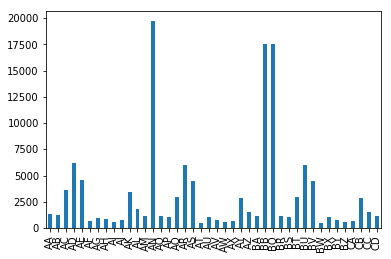

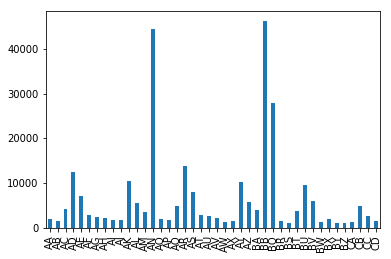

In [34]:
s = d1.sum()
del s["Date"]
plt.figure()
s.plot.bar()
plt.show()
s = d2.sum()
del s["Date"]
plt.figure()
s.plot.bar()
plt.show()